<a href="https://colab.research.google.com/github/ZaietsMykytaFIT/CH_M_Zaiets/blob/main/Lab7_Zaiets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Практична робота 7 - "1 і 2 інтерполяційні формули Ньютона"
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

In [14]:
# задані точки
x = np.array ([i*0.05+0.15 for i in range(0, 11)])
y = np.array ([0.8607, 0.8187, 0.7788, 0.7408,0.7046,0.6703,
               0.6376, 0.6065, 0.5769, 0.5488, 0.5220])

# перша інтерполяційна формула
def nuton(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])

    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod

    return ans

# Шукані точки
x_values = np.array([0.151, 0.505])
y_values = nuton(x, y, x_values)

for i in range(len(x_values)):
    print(f"f({x_values[i]}) = {y_values[i]:.4f}")

[0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65]
f(0.151) = 0.8599
f(0.505) = 0.6035


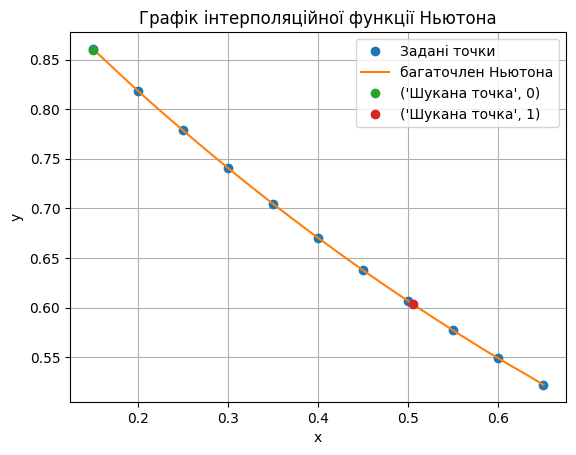

In [17]:
# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)

yy = np.zeros_like(xx)
for i in range(len(xx)):
    yy[i] = nuton (x, y, xx[i])

plt.plot(x, y, 'o', label='Задані точки')
plt.plot(xx, yy, label='багаточлен Ньютона')

# Шукані точки
for i in range(len(x_values)):
    plt.plot(x_values[i], y_values[i], 'o', label=('Шукана точка',i))

plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()